<a href="https://colab.research.google.com/github/ewapastorczak/dataviz/blob/main/DS_intro_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All we need is some good libraries

In [ ]:
#essential data analysis
import numpy as np
#friendly data exploration
import pandas as pd
#essential plot production
import matplotlib.pyplot as plt
#matplotlib but pretty
import seaborn as sns
#matplotlib but modern
import plotly


and some data to plot

In [ ]:
#generate points
x=np.linspace(0,10,100)
#random numbers from normal distribution
y=np.random.randn(100,4)
#print(y)
y=y.cumsum(axis=0)
print(y)

[[ 2.78037130e-01  4.59837506e-02 -1.38315341e+00 -7.63032515e-01]
 [-9.32619610e-01  1.20458119e+00  7.44103028e-01  3.21277431e-01]
 [-2.17734648e+00  1.29910904e+00  1.70393600e+00  1.08013283e+00]
 [-3.99404633e+00  2.60596374e+00  1.66176661e+00  8.59673982e-01]
 [-4.80386761e+00  4.26495854e+00  4.60930372e-01  2.12709467e+00]
 [-4.32563008e+00  6.85344951e+00  2.11967237e-01  2.88372804e-01]
 [-2.82851131e+00  6.53133650e+00 -3.46602515e-01 -4.78100706e-02]
 [-3.36435264e+00  6.90925976e+00  1.96304686e-01  6.61798877e-01]
 [-2.69628436e+00  8.07518353e+00  3.73175219e-01 -3.70677816e-02]
 [-2.63026115e+00  8.56906124e+00 -5.22216109e-01 -1.16275474e+00]
 [-2.66400145e+00  9.12908505e+00  2.18442171e-01 -2.94807438e-01]
 [-2.90210414e+00  8.04147722e+00 -7.27657869e-01  2.06448982e-01]
 [-4.01431640e+00  8.86245296e+00 -1.16587743e+00 -1.55775628e+00]
 [-4.20905240e+00  7.72374763e+00 -1.97205933e+00 -1.62359807e+00]
 [-4.25013720e+00  7.74282649e+00 -3.11496340e+00 -2.35329920e

Now, let's see what we have here:

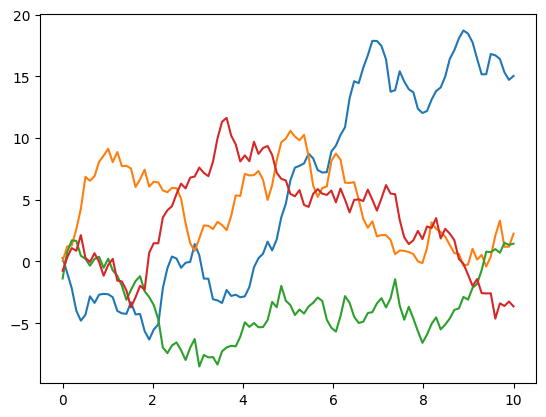

In [ ]:
plt.plot(x,y)

Let's make it prettier.

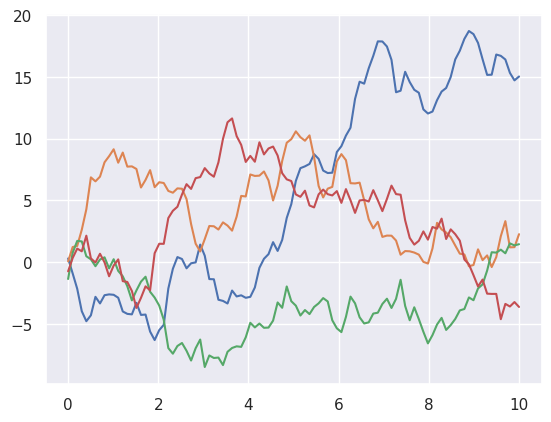

In [ ]:
sns.set()
plt.plot(x,y)

Seaborn can do the same things Matplotlib can, just prettier and simpler.

Some minor data exploration is neccessary now

In [ ]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


A **scatterplot** shows the relationship between two quantitative variables measured for the same individuals. The values of one variable appear on the horizontal axis, and the values of the other variable appear on the vertical axis. Each individual in the data appears as a point on the graph.

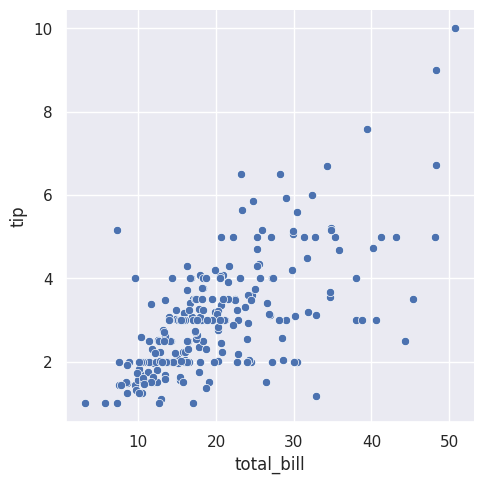

In [ ]:
sns.relplot(data=df,x='total_bill',y='tip')

About 1 in 12 men (8%) and 1 in 200 women are colorblind (approximately 4.5% of the world population). This means if that you have and audience of 20 people, one person will not distinguish between red and green.

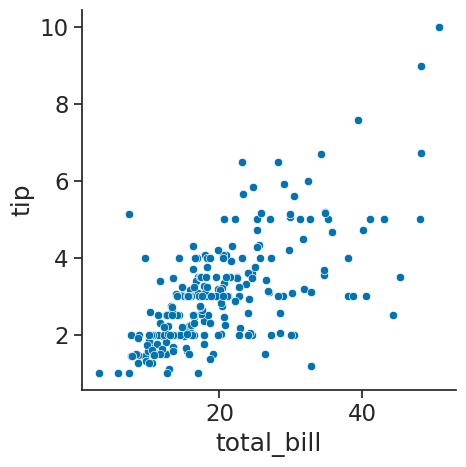

In [ ]:
sns.set(palette='colorblind',style='ticks',font_scale=1.5)
sns.relplot(data=df,x='total_bill',y='tip')

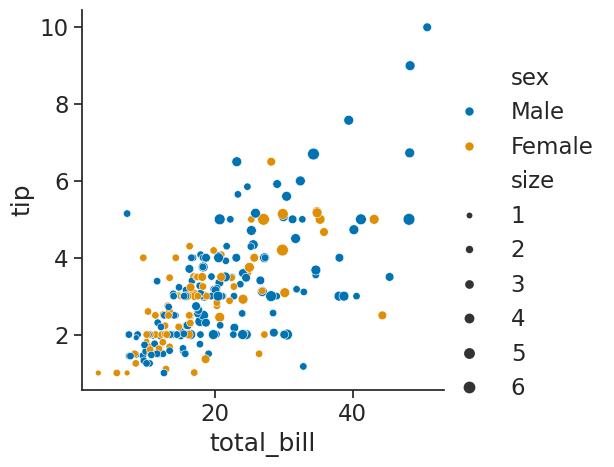

In [ ]:
sns.relplot(data=df,x='total_bill',y='tip',size='size',hue='sex')

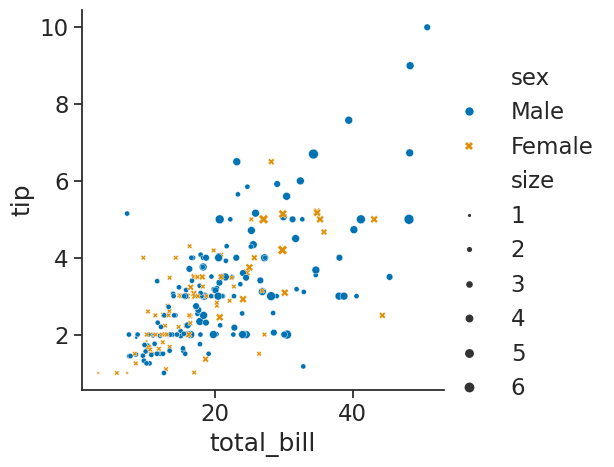

In [ ]:
sns.relplot(data=df,x='total_bill',y='tip',size='size',hue='sex',sizes=(5,50),style='sex')

Does time of day matter?

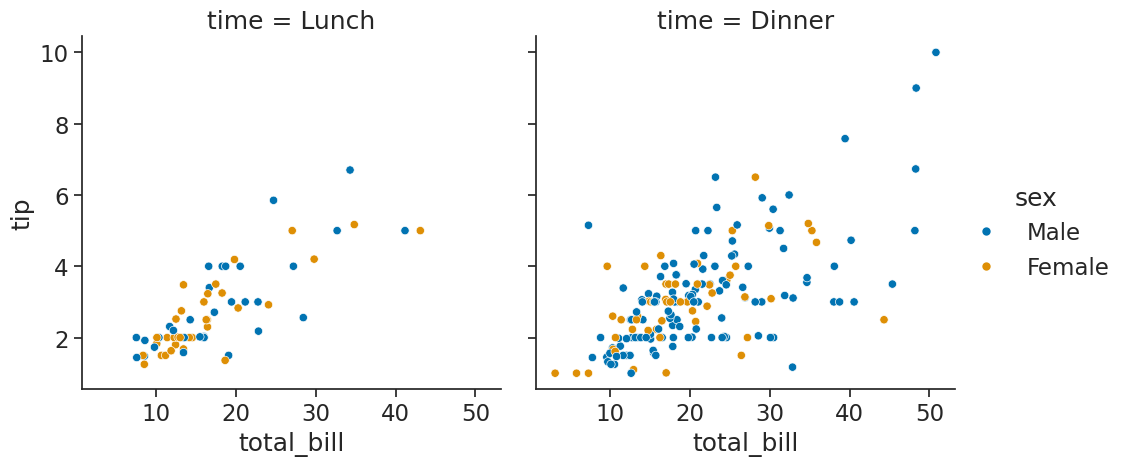

In [ ]:
sns.relplot(data=df,x='total_bill',y='tip',hue='sex',col='time')

Do smokers tip differently?

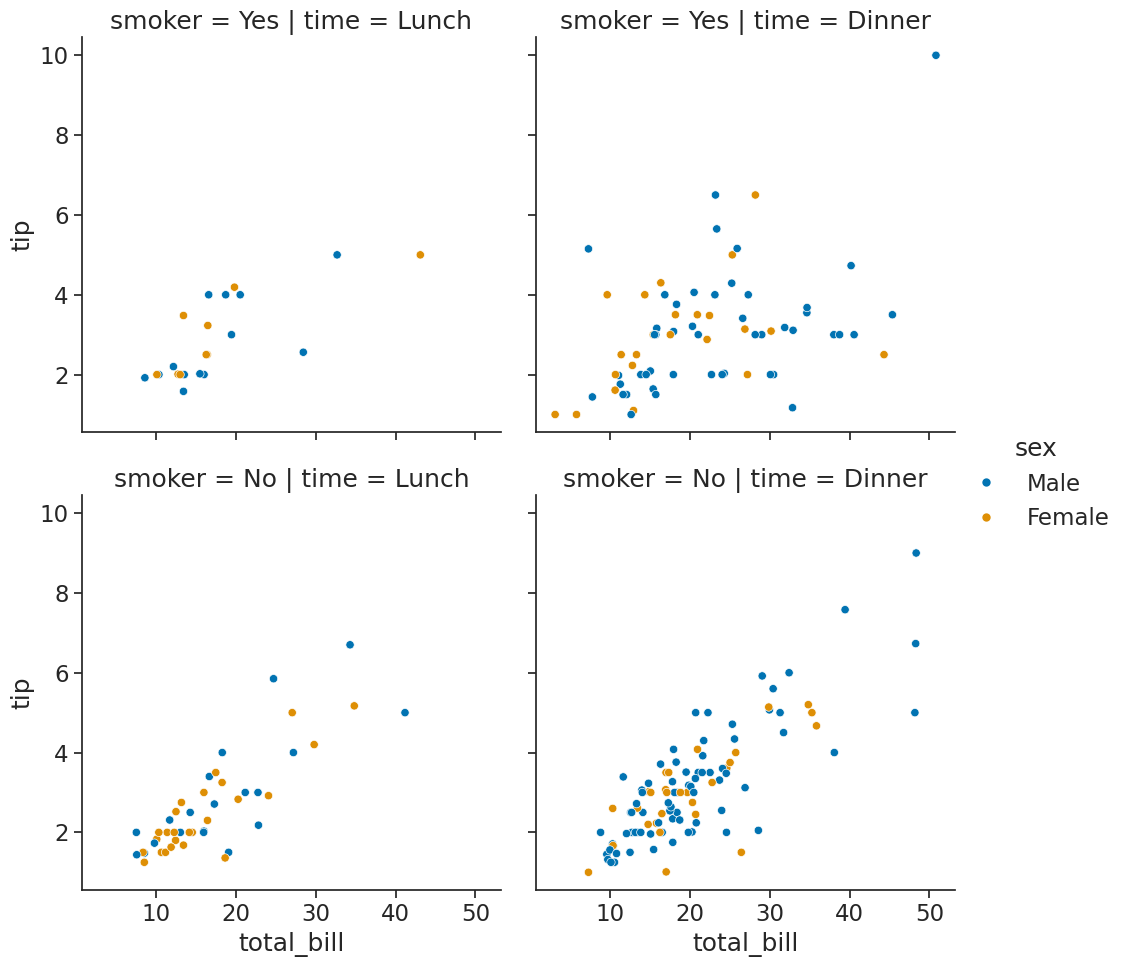

In [ ]:
sns.relplot(data=df,x='total_bill',y='tip',hue='sex',col='time',row='smoker')

# 1-D data analysis

**A histogram**

When:

- when you want to see the approximate shape of the population

Why not:


- There is no "right" number of bins. By changing the number of bins you can manipulate the appearance of the data

<Axes: xlabel='tip', ylabel='Count'>

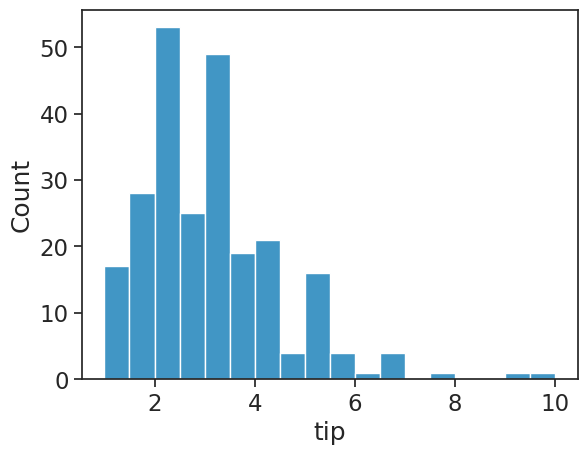

In [ ]:
sns.histplot(df['tip'],kde=False)

KDE - kernel density estimation

<Axes: xlabel='total_bill', ylabel='Count'>

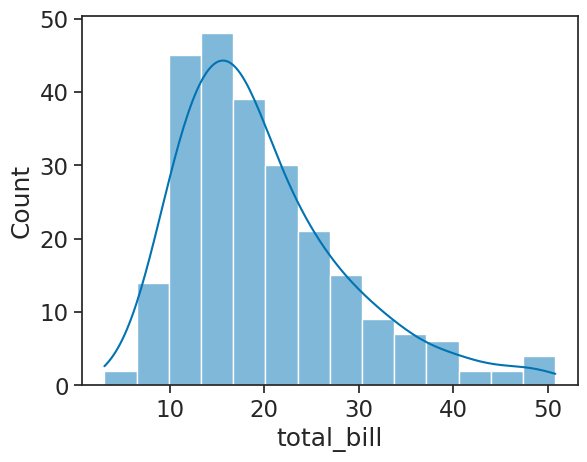

In [ ]:
sns.histplot(df['total_bill'],kde=True)


Box plot
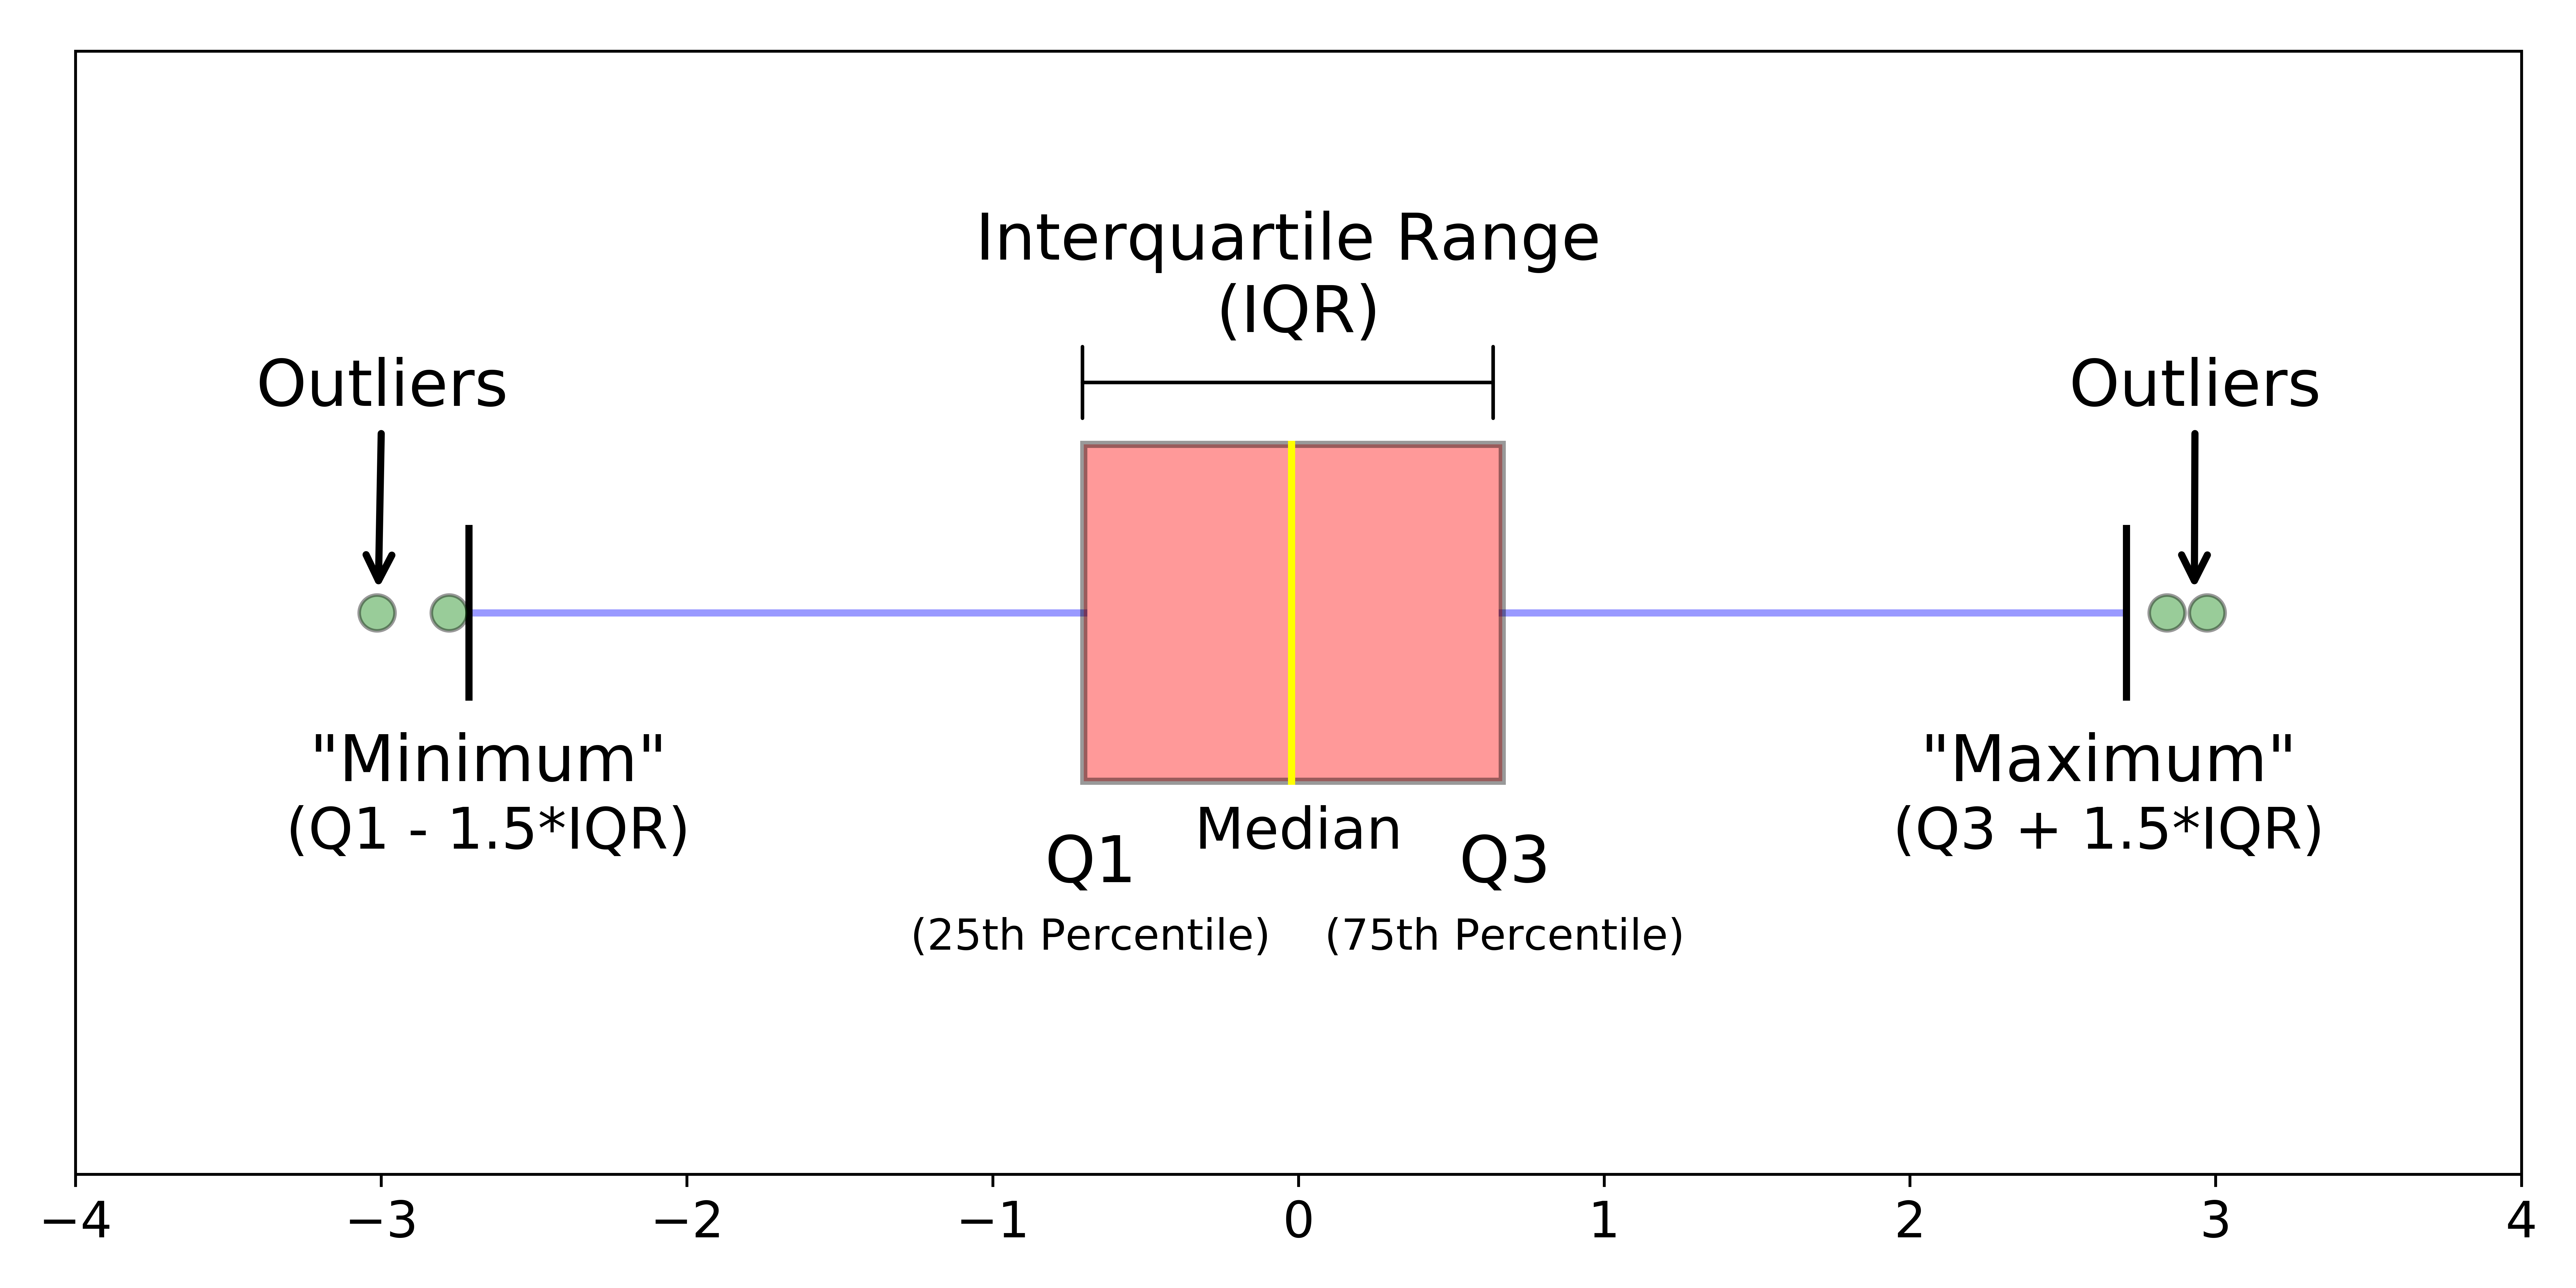
When:
- when you want to summarize 1-D data in a simple way;
- you want to see outliers, symmetry, skewnesss

Why not:

- Incomprehensible for the mathematically illiterate

<Axes: xlabel='day', ylabel='total_bill'>

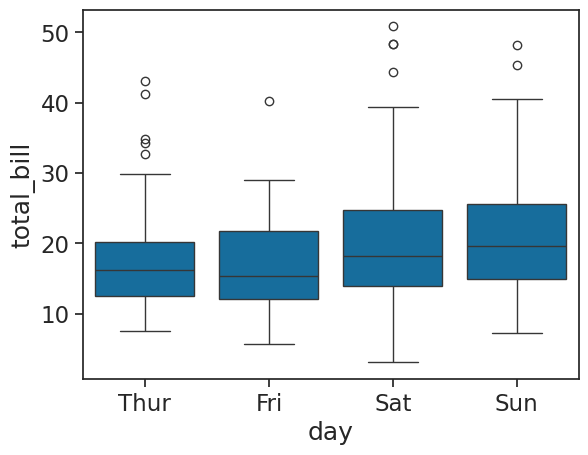

In [ ]:
sns.boxplot(data=df,x='day',y='total_bill')

<Axes: xlabel='day', ylabel='tip'>

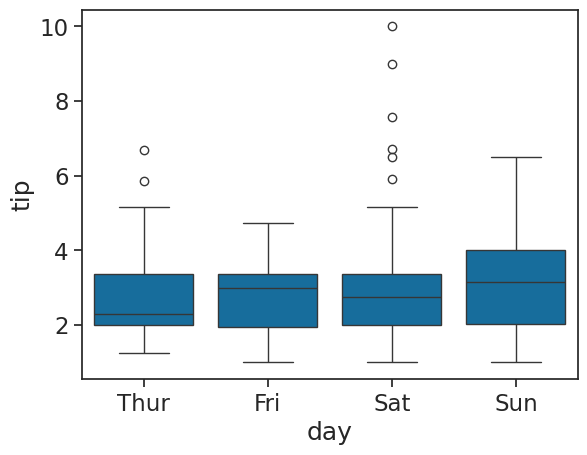

In [ ]:
sns.boxplot(data=df,x='day',y='tip')

Violin plot:  box plot + probability distribution plot.
When:


*   Lots of 1-dimensional data
*   If we suspect a bimodal distribution

Why not:


*   Lots of people don't know how to read it


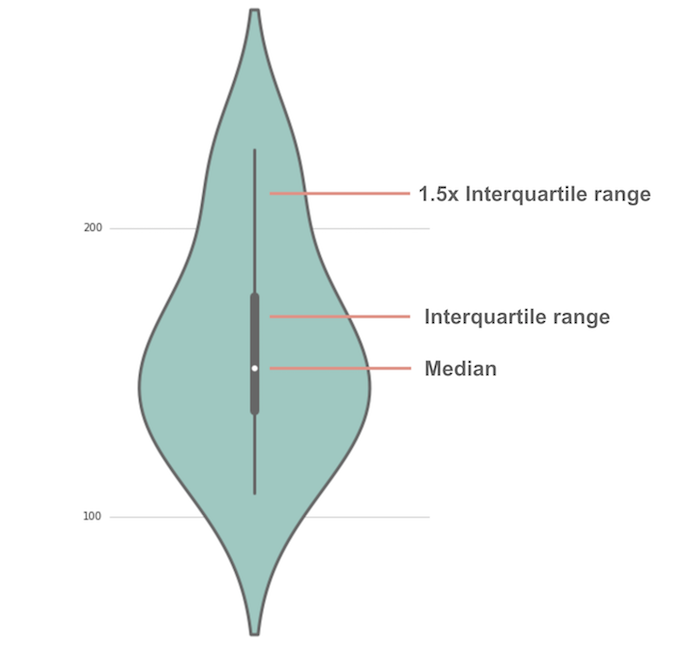


<Axes: xlabel='day', ylabel='total_bill'>

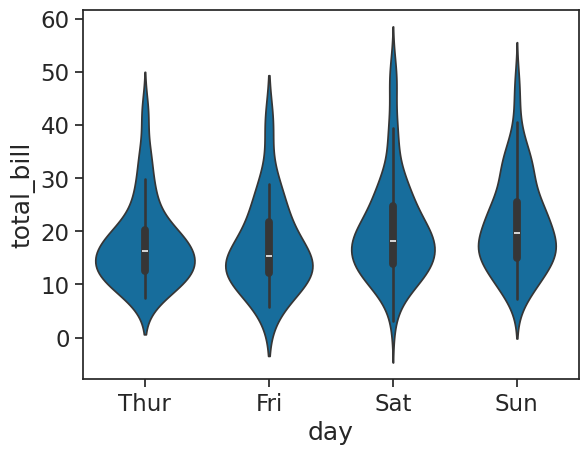

In [ ]:
sns.violinplot(data=df,x='day',y='total_bill')

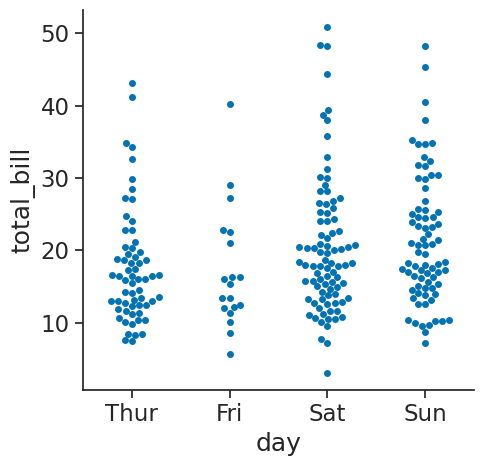

In [ ]:
sns.catplot(data=df,x='day',y='total_bill',kind='swarm')

In [2]:
sns.catplot(data=df,x='day',y='total_bill',kind='box')

NameError: name 'sns' is not defined

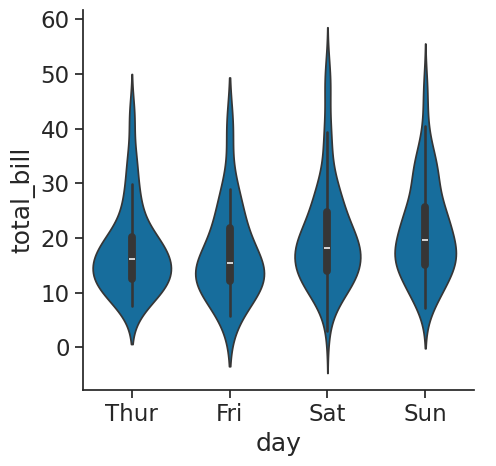

In [ ]:
sns.catplot(data=df,x='day',y='total_bill',kind='violin')

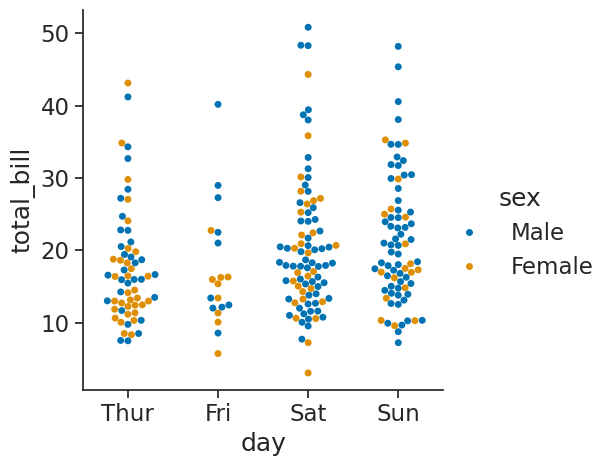

In [ ]:
sns.catplot(data=df,x='day',y='total_bill',kind='swarm',hue='sex')

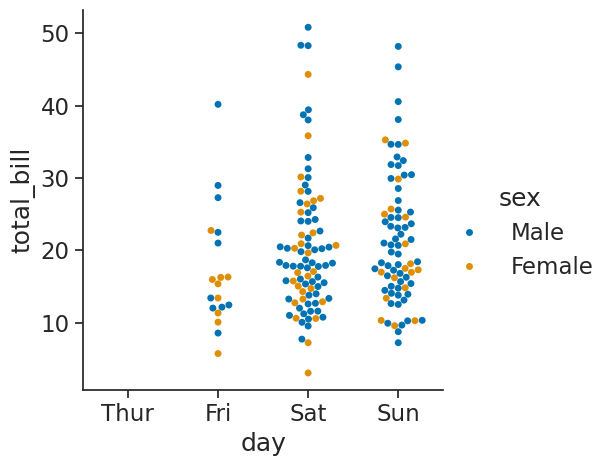

In [ ]:
sns.catplot(data=df.query("day==['Fri','Sat','Sun']"),x='day',y='total_bill',kind='swarm',hue='sex')

In [ ]:
female=df.query("sex=='Female'")
male=df.query("sex=='Male'")

https://seaborn.pydata.org/generated/seaborn.catplot.html

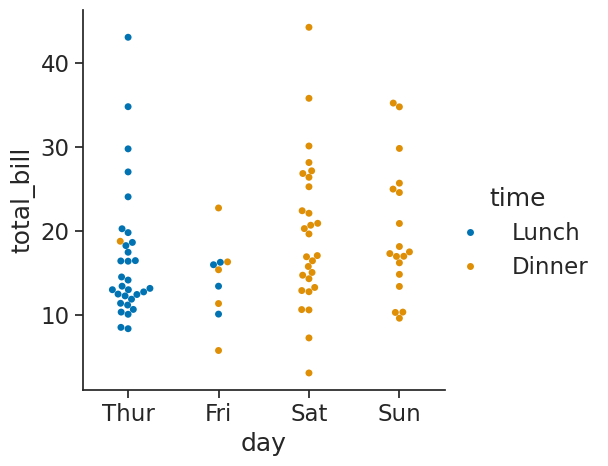

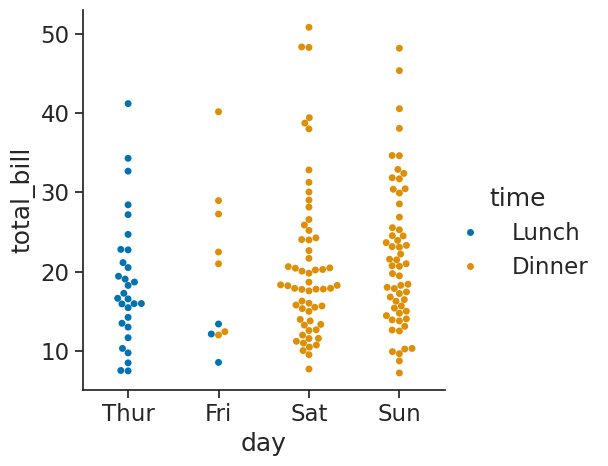

In [ ]:
sns.catplot(data=female,x='day',y='total_bill',kind='swarm',hue='time')
sns.catplot(data=male,x='day',y='total_bill',kind='swarm',hue='time')

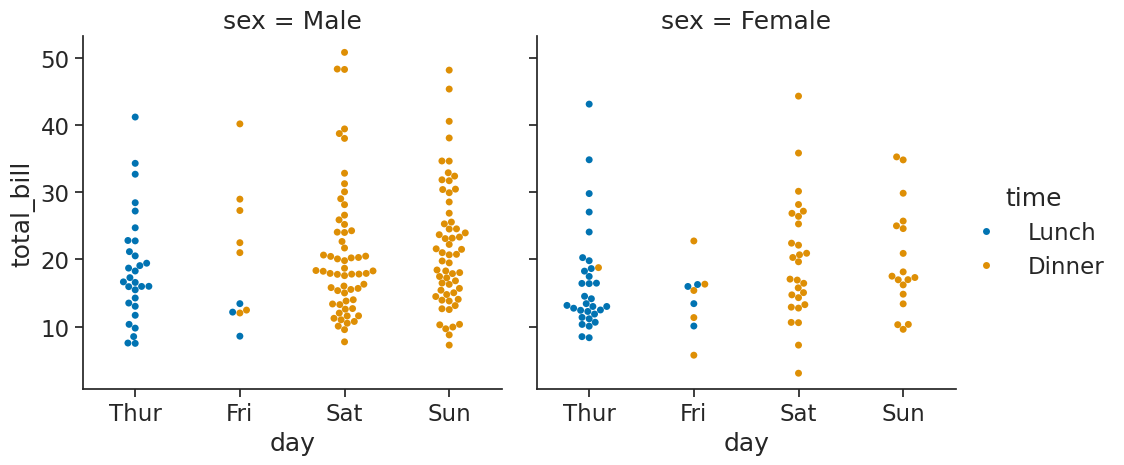

In [ ]:
sns.catplot(data=df,x='day',y='total_bill',kind='swarm',hue='time',col='sex')

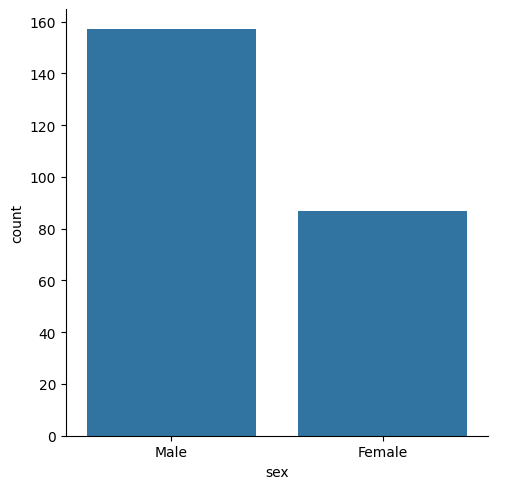

In [ ]:
sns.catplot(data=df,x='sex',kind='count')

**Practice excercises**
1. You work for the restaurant owners. Prepare plots that will help them decide what clients they should target when promoting the restaurant.
2. You work for the restaurant staff. Prepare plots that will help them decide the most fair schedule.